In [1]:
import numpy as np
import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
!pip install mnist keras tensorflow

In [3]:
!pip --version

pip 19.1.1 from C:\Users\NOEL\Anaconda3\lib\site-packages\pip (python 3.7)



In [4]:
train_images=mnist.train_images()  #train_x
train_labels=mnist.train_labels()  #train_y
test_images=mnist.test_images()   #test_x
test_labels=mnist.test_labels()  #test_y

In [5]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
type(train_images)

numpy.ndarray

In [8]:
train_labels[0]

5

In [9]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

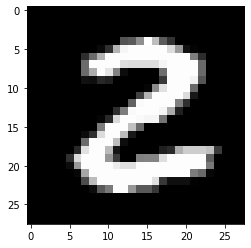

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
first_image=train_images[25]
plt.imshow(first_image,cmap='gray')  # for gray scale
plt.show()

In [11]:
test_images.shape

(10000, 28, 28)

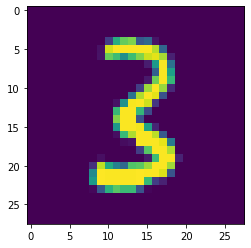

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
first_image=train_images[50000]
plt.imshow(first_image)  #by default takes RGB values
plt.show()

In [13]:
# Normalize the image
train_images=(train_images/255) - 0.5
test_images=(test_images/255) - 0.5

In [14]:
train_images[0]

array([[-0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       ],
       [-0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       ],
       [-0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5   

In [15]:
# Flatten the image
train_images=train_images.reshape((-1 , 784))
test_images=test_images.reshape((-1 , 784))

In [16]:
# Built the model
model=Sequential([
    Dense(64,activation='relu', input_shape=(784,)),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax'),
])

In [17]:
# compile the model.
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [18]:
# Train the model
model.fit(
    test_images,
    to_categorical(test_labels),
    epochs=5,
    batch_size=32,
)

Epoch 1/5
10000/10000 [==============================] - 1s 84us/step - loss: 0.6356 - accuracy: 0.8173
Epoch 2/5
10000/10000 [==============================] - 1s 61us/step - loss: 0.3180 - accuracy: 0.9046
Epoch 3/5
10000/10000 [==============================] - 1s 75us/step - loss: 0.2590 - accuracy: 0.9209
Epoch 4/5
10000/10000 [==============================] - 1s 74us/step - loss: 0.2179 - accuracy: 0.9318
Epoch 5/5
10000/10000 [==============================] - 1s 71us/step - loss: 0.1844 - accuracy: 0.9422


In [19]:
# Evaluate the model
model.evaluate(
    test_images,
    to_categorical(test_labels)
)

10000/10000 [==============================] - 0s 30us/step


[0.1545761942073703, 0.953000009059906]

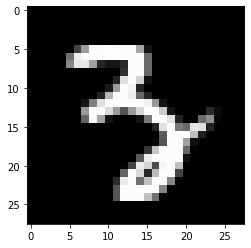

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
first_image=test_images[87]
plt.imshow(first_image.reshape((28,28)),cmap='gray')  #by default takes RGB values
plt.show()

In [28]:
np.argmax(model.predict(test_images[87].reshape((-1,784))))

3

In [22]:
# save the model to disk
model.save_weights('model.h5')

#load the model form disk later using:
#model.load_weights('model.h5')

#predict on the first 5 test images.
predictions=model.predict(test_images[:5])

# print our model predictions.
print(np.argmax(predictions,axis=1))  #[7,2,1,0,4]

# check our predictions against the ground truths
print(test_labels[:5]) #[7,2,1,0,4]

[7 2 1 0 4]
[7 2 1 0 4]
